In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data= pd.read_csv('Country-data.csv')
df=data.copy()

In [3]:
df.head(100).tail(10)

country  child_mort  exports  health  imports  income  inflation  \
90       Lithuania         6.1     65.3    7.04     67.2   21100       2.38   
91      Luxembourg         2.8    175.0    7.77    142.0   91700       3.62   
92  Macedonia, FYR        10.4     39.8    7.09     58.1   11400       2.04   
93      Madagascar        62.2     25.0    3.77     43.0    1390       8.79   
94          Malawi        90.5     22.8    6.59     34.9    1030      12.10   
95        Malaysia         7.9     86.9    4.39     71.0   21100       7.27   
96        Maldives        13.2     77.6    6.33     65.4   10500       2.88   
97            Mali       137.0     22.8    4.98     35.1    1870       4.37   
98           Malta         6.8    153.0    8.65    154.0   28300       3.83   
99      Mauritania        97.4     50.7    4.41     61.2    3320      18.90   

    life_expec  total_fer    gdpp  
90        73.2       1.50   12000  
91        81.3       1.63  105000  
92        74.0       1.47    4540  
93        60.8       4.60     413  
94        53.1       5.31     459  
95        74.5       2.15    9070  
96        77.9       2.23    7100  
97        59.5       6.55     708  
98        80.3       1.36   21100  
99        68.2       4.98    1200

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

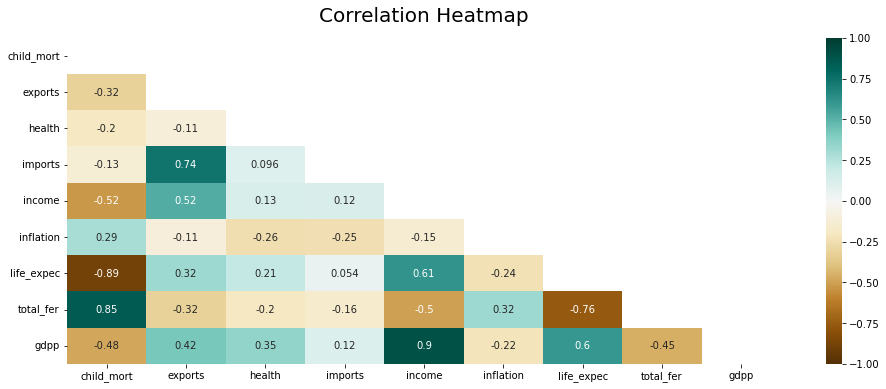

In [5]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=16)

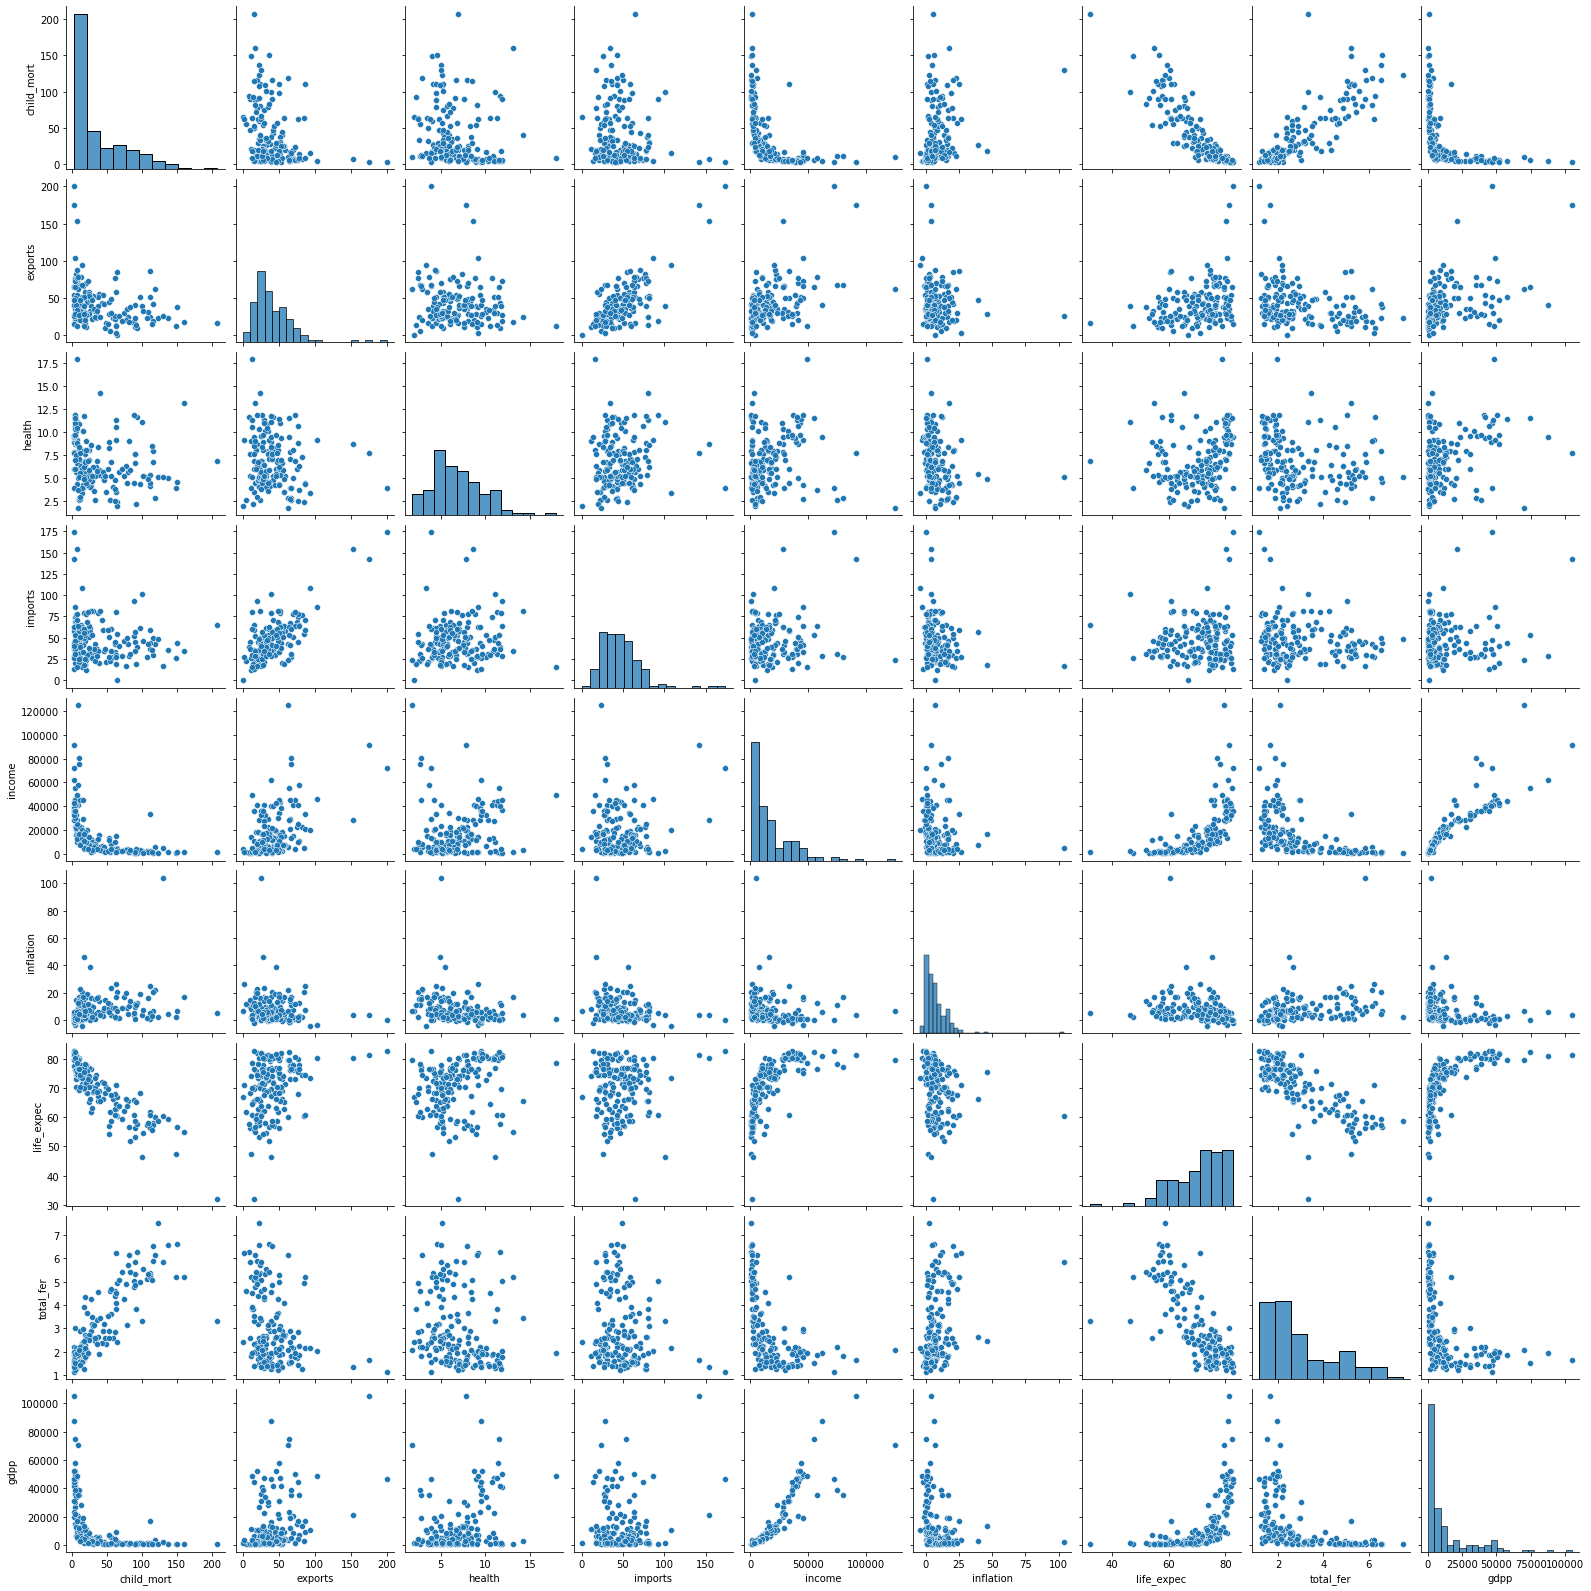

In [6]:
sns.pairplot(df)

In [7]:
df.set_index('country', inplace=True)

In [8]:
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

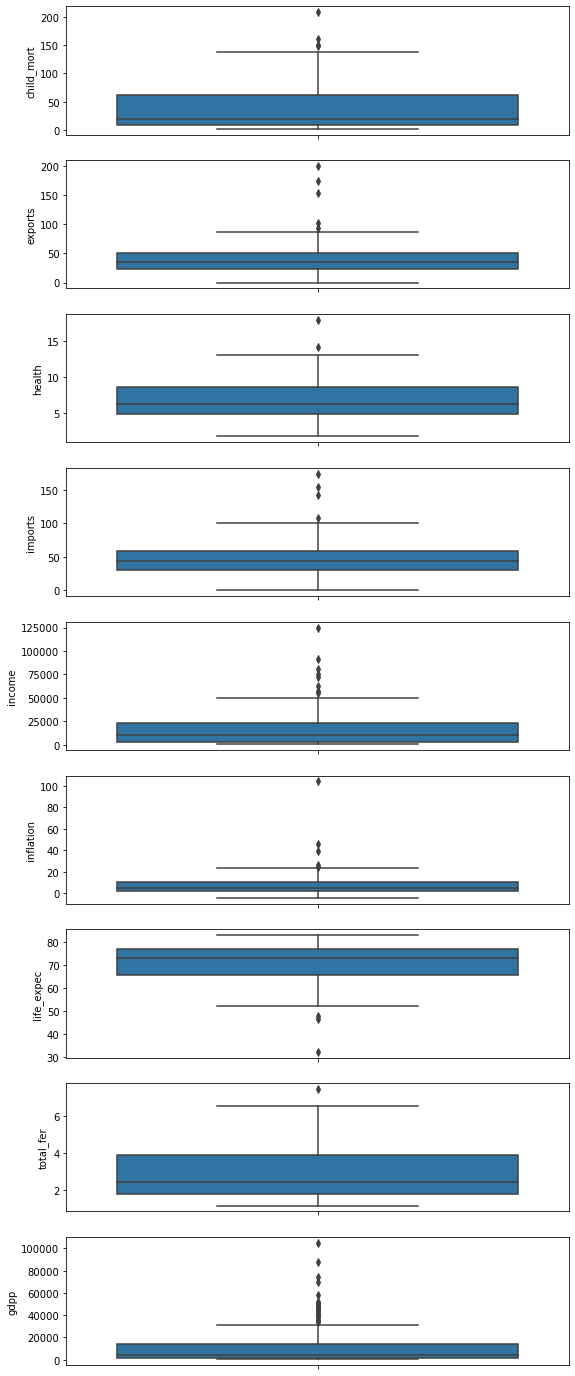

In [9]:
column_names = df.columns
fig,axes = plt.subplots(nrows=len(column_names),figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y = column_names[i],data=df)

In [10]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [11]:
for col in df.columns: 
    lowerbound,upperbound = outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min=lowerbound,a_max=upperbound)

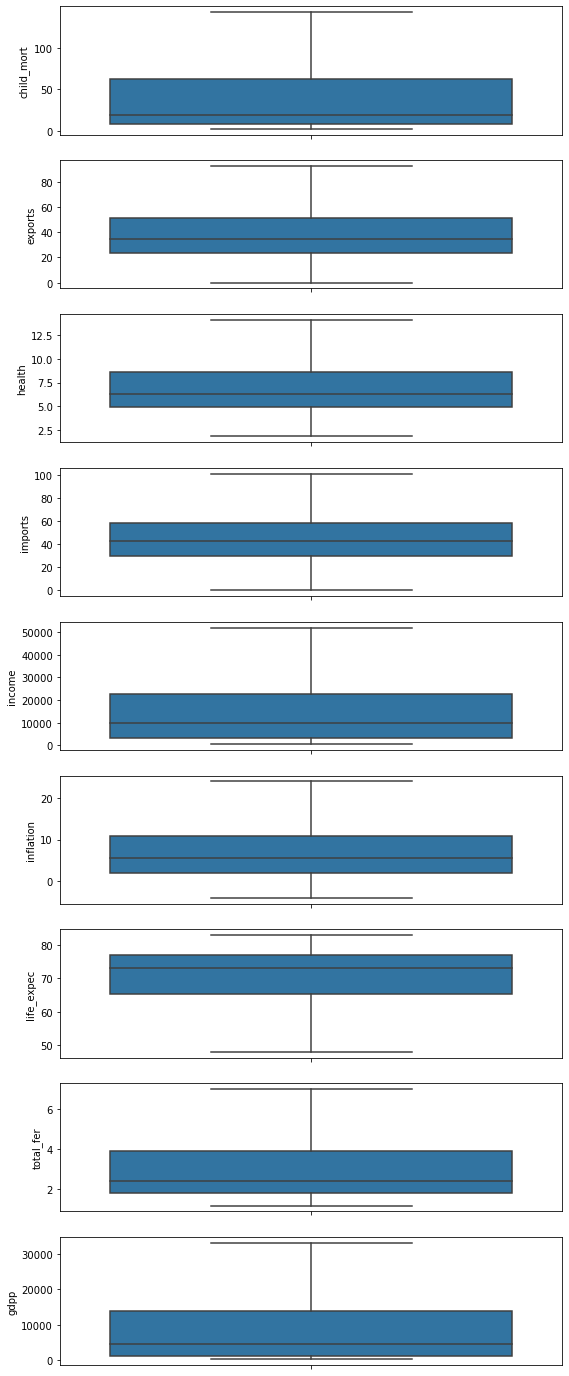

In [12]:
column_names = df.columns
fig, axes = plt.subplots(nrows=len(column_names),figsize=(9,25))
for i in range(len(column_names)):
    
    sns.boxplot(ax=axes[i],y = column_names[i],data=df)

In [13]:
from sklearn.preprocessing import StandardScaler #scaling the data
column_names = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, index=data.country, columns=column_names)

In [14]:
df

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.369802 -1.391107  0.296013 -0.047444 -0.943936   
Albania               -0.550464 -0.543547 -0.091190  0.135021 -0.395181   
Algeria               -0.271295 -0.053846 -0.985893 -0.713196 -0.199291   
Angola                 2.121210  1.071524 -1.482114 -0.146074 -0.660984   
Antigua and Barbuda   -0.714835  0.280469 -0.286671  0.642965  0.209637   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.221723  0.332264 -0.579893  0.337212 -0.855555   
Venezuela             -0.537419 -0.520004 -0.707708 -1.393742  0.038151   
Vietnam               -0.375657  1.528265  0.017828  1.693373 -0.753982   
Yemen                  0.485332 -0.449374 -0.606208 -0.565251 -0.754642   
Zambia                 1.184559 -0.119768 -0.339301 -0.737854 -0.833789   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.355270   -1.702225   1.915276 -0.846341  
Albania              -0.385208    0.663321  -0.862779 -0.540827  
Algeria               1.351551    0.686859  -0.036691 -0.508868  
Angola                2.293979   -1.243238   2.141784 -0.589198  
Antigua and Barbuda  -0.841463    0.722166  -0.543003  0.159686  
...                        ...         ...        ...       ...  
Vanuatu              -0.664945   -0.901941   0.369691 -0.637569  
Venezuela             2.557260    0.557401  -0.316495  0.271975  
Vietnam               0.753184    0.286717  -0.662919 -0.780954  
Yemen                 2.473489   -0.372341   1.149146 -0.780954  
Zambia                1.037409   -2.196518   1.635472 -0.767998  

[167 rows x 9 columns]

# Clustering K Means 

In [15]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, random_state=123).fit(df)

In [16]:
k_means.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [18]:
df_final = data.copy()

In [28]:
df_final.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp K_Means_clusters  
0       9.44        56.2       5.82    553   Underdeveloped  
1       4.49        76.3       1.65   4090       Developing  
2      16.10        76.5       2.89   4460       Developing  
3      22.40        60.1       6.16   3530   Underdeveloped  
4       1.44        76.8       2.13  12200       Developing

In [23]:
df_final['K_Means_clusters']=k_means.labels_ 
#0 - developed
#1 - developing
#2 -underdeveloped

In [25]:
df_final[df_final['K_Means_clusters']==2].head()

country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2    10.00    7.58     44.9    1610      9.440   
3         Angola       119.0    62.30    2.85     42.9    5900     22.400   
17         Benin       111.0    23.80    4.10     37.2    1820      0.885   
25  Burkina Faso       116.0    19.20    6.74     29.6    1430      6.810   
26       Burundi        93.6     8.92   11.60     39.2     764     12.300   

    life_expec  total_fer  gdpp  K_Means_clusters  
0         56.2       5.82   553                 2  
3         60.1       6.16  3530                 2  
17        61.8       5.36   758                 2  
25        57.9       5.87   575                 2  
26        57.7       6.26   231                 2

In [27]:
df_final['K_Means_clusters'].replace({0:'Developed', 1:'Developing', 2:'Underdeveloped'}, inplace=True)

In [29]:
df_final.K_Means_clusters.value_counts()

Developing        79
Underdeveloped    47
Developed         41
Name: K_Means_clusters, dtype: int64

# Clustering with Hierachial 

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [32]:
df_final['Hierachial_clusters']=hc
df_final

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp K_Means_clusters  \
0         9.44        56.2       5.82    553   Underdeveloped   
1         4.49        76.3       1.65   4090       Developing   
2        16.10        76.5       2.89   4460       Developing   
3        22.40        60.1       6.16   3530   Underdeveloped   
4         1.44        76.8       2.13  12200       Developing   
..         ...         ...        ...    ...              ...   
162       2.62        63.0       3.50   2970       Developing   
163      45.90        75.4       2.47  13500       Developing   
164      12.10        73.1       1.95   1310       Developing   
165      23.60        67.5       4.67   1310   Underdeveloped   
166      14.00        52.0       5.40   1460   Underdeveloped   

     Hierachial_clusters  
0                      2  
1                      1  
2                      1  
3                      2  
4                      0  
..                   ...  
162                    0  
163                    1  
164                    0  
165                    2  
166                    2  

[167 rows x 12 columns]

In [33]:
df_final[df_final['Hierachial_clusters']==2].head()

country  child_mort  exports  health  imports  income  inflation  \
0    Afghanistan        90.2    10.00    7.58     44.9    1610      9.440   
3         Angola       119.0    62.30    2.85     42.9    5900     22.400   
17         Benin       111.0    23.80    4.10     37.2    1820      0.885   
25  Burkina Faso       116.0    19.20    6.74     29.6    1430      6.810   
26       Burundi        93.6     8.92   11.60     39.2     764     12.300   

    life_expec  total_fer  gdpp K_Means_clusters  Hierachial_clusters  
0         56.2       5.82   553   Underdeveloped                    2  
3         60.1       6.16  3530   Underdeveloped                    2  
17        61.8       5.36   758   Underdeveloped                    2  
25        57.9       5.87   575   Underdeveloped                    2  
26        57.7       6.26   231   Underdeveloped                    2

In [34]:
df_final['Hierachial_clusters'].replace({0:'Developed', 1:'Developing', 2:'Underdeveloped'}, inplace=True)

In [35]:
df_final.Hierachial_clusters.value_counts()

Developed         71
Developing        61
Underdeveloped    35
Name: Hierachial_clusters, dtype: int64

In [36]:
from sklearn.decomposition import PCA

In [38]:
social_score = ['child_mort', 'health', 'life_expec', 'total_fer']
economic_score = ['exports','imports', 'inflation', 'income', 'gdpp']

In [39]:
pca = PCA(n_components=1)

In [40]:
soc_column = ['social_score']
eco_column = ['economic_score']
pca_social = pca.fit_transform(X=df[social_score])
pca_social = pd.DataFrame(data=pca_social,columns = soc_column)
pca_economy = pca.fit_transform(X=df[economic_score])
pca_economy = pd.DataFrame(data=pca_economy,columns = eco_column)

In [41]:
df.pca = pd.concat([pca_economy, pca_social, df_final [['country', 'Hierachial_clusters','K_Means_clusters']]],axis=1 )

C:\Users\frasulov\AppData\Local\Temp\ipykernel_9336\2992790779.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.pca = pd.concat([pca_economy, pca_social, df_final [['country', 'Hierachial_clusters','K_Means_clusters']]],axis=1 )


In [42]:
df.pca.head()

economic_score  social_score              country Hierachial_clusters  \
0       -1.763849      2.755081          Afghanistan      Underdeveloped   
1       -0.624135     -1.153072              Albania          Developing   
2       -1.011411     -0.364122              Algeria          Developing   
3       -0.941858      3.416022               Angola      Underdeveloped   
4        0.755015     -1.063376  Antigua and Barbuda           Developed   

  K_Means_clusters  
0   Underdeveloped  
1       Developing  
2       Developing  
3   Underdeveloped  
4       Developing